In [1]:
from glob import glob
import ek80Spectra

files = sorted(glob('D:/SME80/RWP*D2020072*FM_split.raw')) # grab the split (FM only) raw files
rawFiles = files[:24];
print(rawFiles) # Let's grab only 2 as an example

calFilesXML=glob('D:/SME80/*.xml');print(calFilesXML) # Here are the calibration filesfrom EK80

['D:/SME80\\RWP_2018_deployment_plan-Phase0-D20200720-T001515-0-pp_55-90FM_split.raw', 'D:/SME80\\RWP_2018_deployment_plan-Phase0-D20200720-T021516-0-pp_55-90FM_split.raw', 'D:/SME80\\RWP_2018_deployment_plan-Phase0-D20200720-T041515-0-pp_55-90FM_split.raw', 'D:/SME80\\RWP_2018_deployment_plan-Phase0-D20200720-T061516-0-pp_55-90FM_split.raw', 'D:/SME80\\RWP_2018_deployment_plan-Phase0-D20200720-T081515-0-pp_55-90FM_split.raw', 'D:/SME80\\RWP_2018_deployment_plan-Phase0-D20200720-T101516-0-pp_55-90FM_split.raw', 'D:/SME80\\RWP_2018_deployment_plan-Phase0-D20200720-T121516-0-pp_55-90FM_split.raw', 'D:/SME80\\RWP_2018_deployment_plan-Phase0-D20200720-T141515-0-pp_55-90FM_split.raw', 'D:/SME80\\RWP_2018_deployment_plan-Phase0-D20200720-T161516-0-pp_55-90FM_split.raw', 'D:/SME80\\RWP_2018_deployment_plan-Phase0-D20200720-T181517-0-pp_55-90FM_split.raw', 'D:/SME80\\RWP_2018_deployment_plan-Phase0-D20200720-T201515-0-pp_55-90FM_split.raw', 'D:/SME80\\RWP_2018_deployment_plan-Phase0-D20200720-

In [2]:
# Read it all in. The first two values are the window x-dimension (40 pings) and window z-dimension (5 meters). Using 0 for the x just uses the width of each file.
# 's' is just an ek80Spectra object that contains the echolab object and some. I've got some hardcoded cutoffs, such that the bins start at 3 m to remove the transmit.
s = ek80Spectra.ek80Spectra(0, 5,rawFiles, calFilesXML)

Reading raw files...
Found  1 frequencies: [70000.0]


In [3]:
# Calculate the spectra
# Currently since echolab is having difficutly with ECS files and only stores the gain for the nominal frequency, 
# it will only calculate spectra for frequencies with an EK80 cal file
s.calcSpectra()

Calculating spectra for  70000.0
Grabbing cal data from  .xml file
Calculating spectra for 19 vertical windows in 24  files


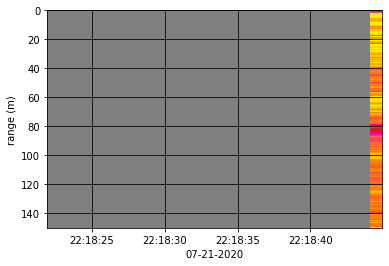

In [4]:
# Since the echolab data is in there let's plot up Sv
from matplotlib.pyplot import figure, show, subplots_adjust, get_cmap
from echolab2.plotting.matplotlib import echogram
d_sv =s.data.get_Sv()
fig_1 = figure()
eg = echogram.Echogram(fig_1, d_sv)

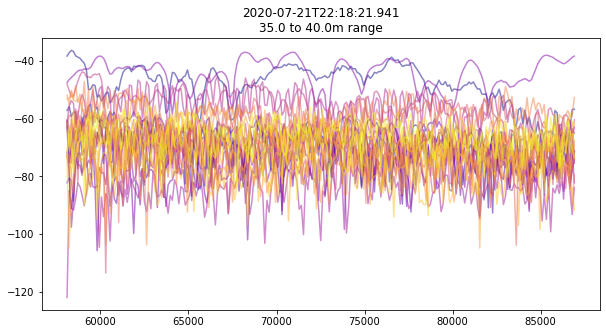

In [51]:
# And there's some quick plotting built in, where the input is the x and z window index (e.g., first x window, 7th z window):
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np

windowZ = 7
windowX = 24

fig = plt.figure(figsize=(10,5))


color = cm.plasma(np.linspace(0, 1, windowX))
freqfilt = tuple([(s.spectraDict[freq]['frequency'] >58000) & (s.spectraDict[freq]['frequency'] <87000)])

for i in range(windowX):
    for freq in s.spectraDict.keys():
        plt.plot(s.spectraDict[freq]['frequency'][freqfilt],s.spectraDict[freq]['Sv'][i][windowZ][freqfilt],color=color[i],alpha=0.5)
        plt.title(s.spectraDict[freq]['windowPingStartTime'][i].astype(str)+'\n'+\
                  str(s.spectraDict[freq]['rangeBinCenters'][windowZ]-s.windowZ/2)+\
                  ' to '+str(s.spectraDict[freq]['rangeBinCenters'][windowZ]+s.windowZ/2)+'m range')

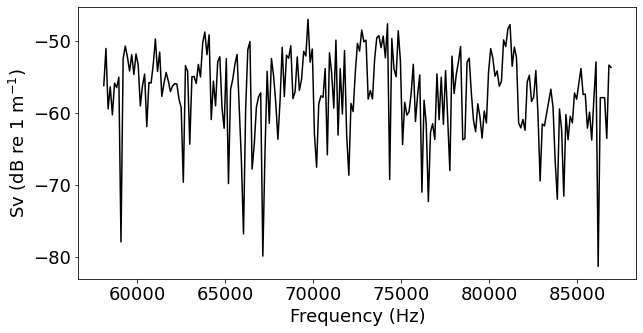

In [85]:
# And there's some quick plotting built in, where the input is the x and z window index (e.g., first x window, 7th z window):
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np

windowZ = 14
windowX = [7]

plt.rcParams.update({'font.size':18})
fig = plt.figure(figsize=(10,5))


color = cm.plasma(np.linspace(0, 1, 1))
freqfilt = tuple([(s.spectraDict[freq]['frequency'] >58000) & (s.spectraDict[freq]['frequency'] <87000)])

plt.rcParams

for i in windowX:
    for freq in s.spectraDict.keys():
        plt.plot(s.spectraDict[freq]['frequency'][freqfilt],s.spectraDict[freq]['Sv'][i][windowZ][freqfilt],color='k',alpha=1)
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Sv (dB re 1 m$^{-1}$)')

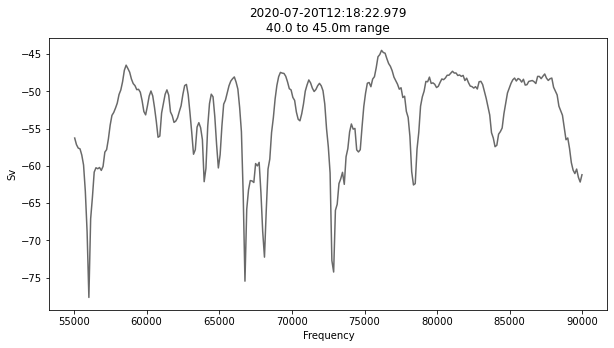

In [47]:
s.plotSpec(6,8)